## EE 242 Lab 2 – Convolution

Mason Wheeler

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises involving convolution of time signals and images.  This is a two-week lab.  You should plan on completing the first 3 assignments in the first week.

## Lab 2 turn in checklist

•	Pre-lab (upload to canvas before lab)

•	Lab 1 Jupyter notebook with code for the first 4 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

•	1 individual Jupyter notebook with code + markdown cells for the last exercise

Note: The pre-lab should be done individually, and all other assignments should be completed in groups of 3-4 people.


## Assignment 1 -- Simple Convolutions

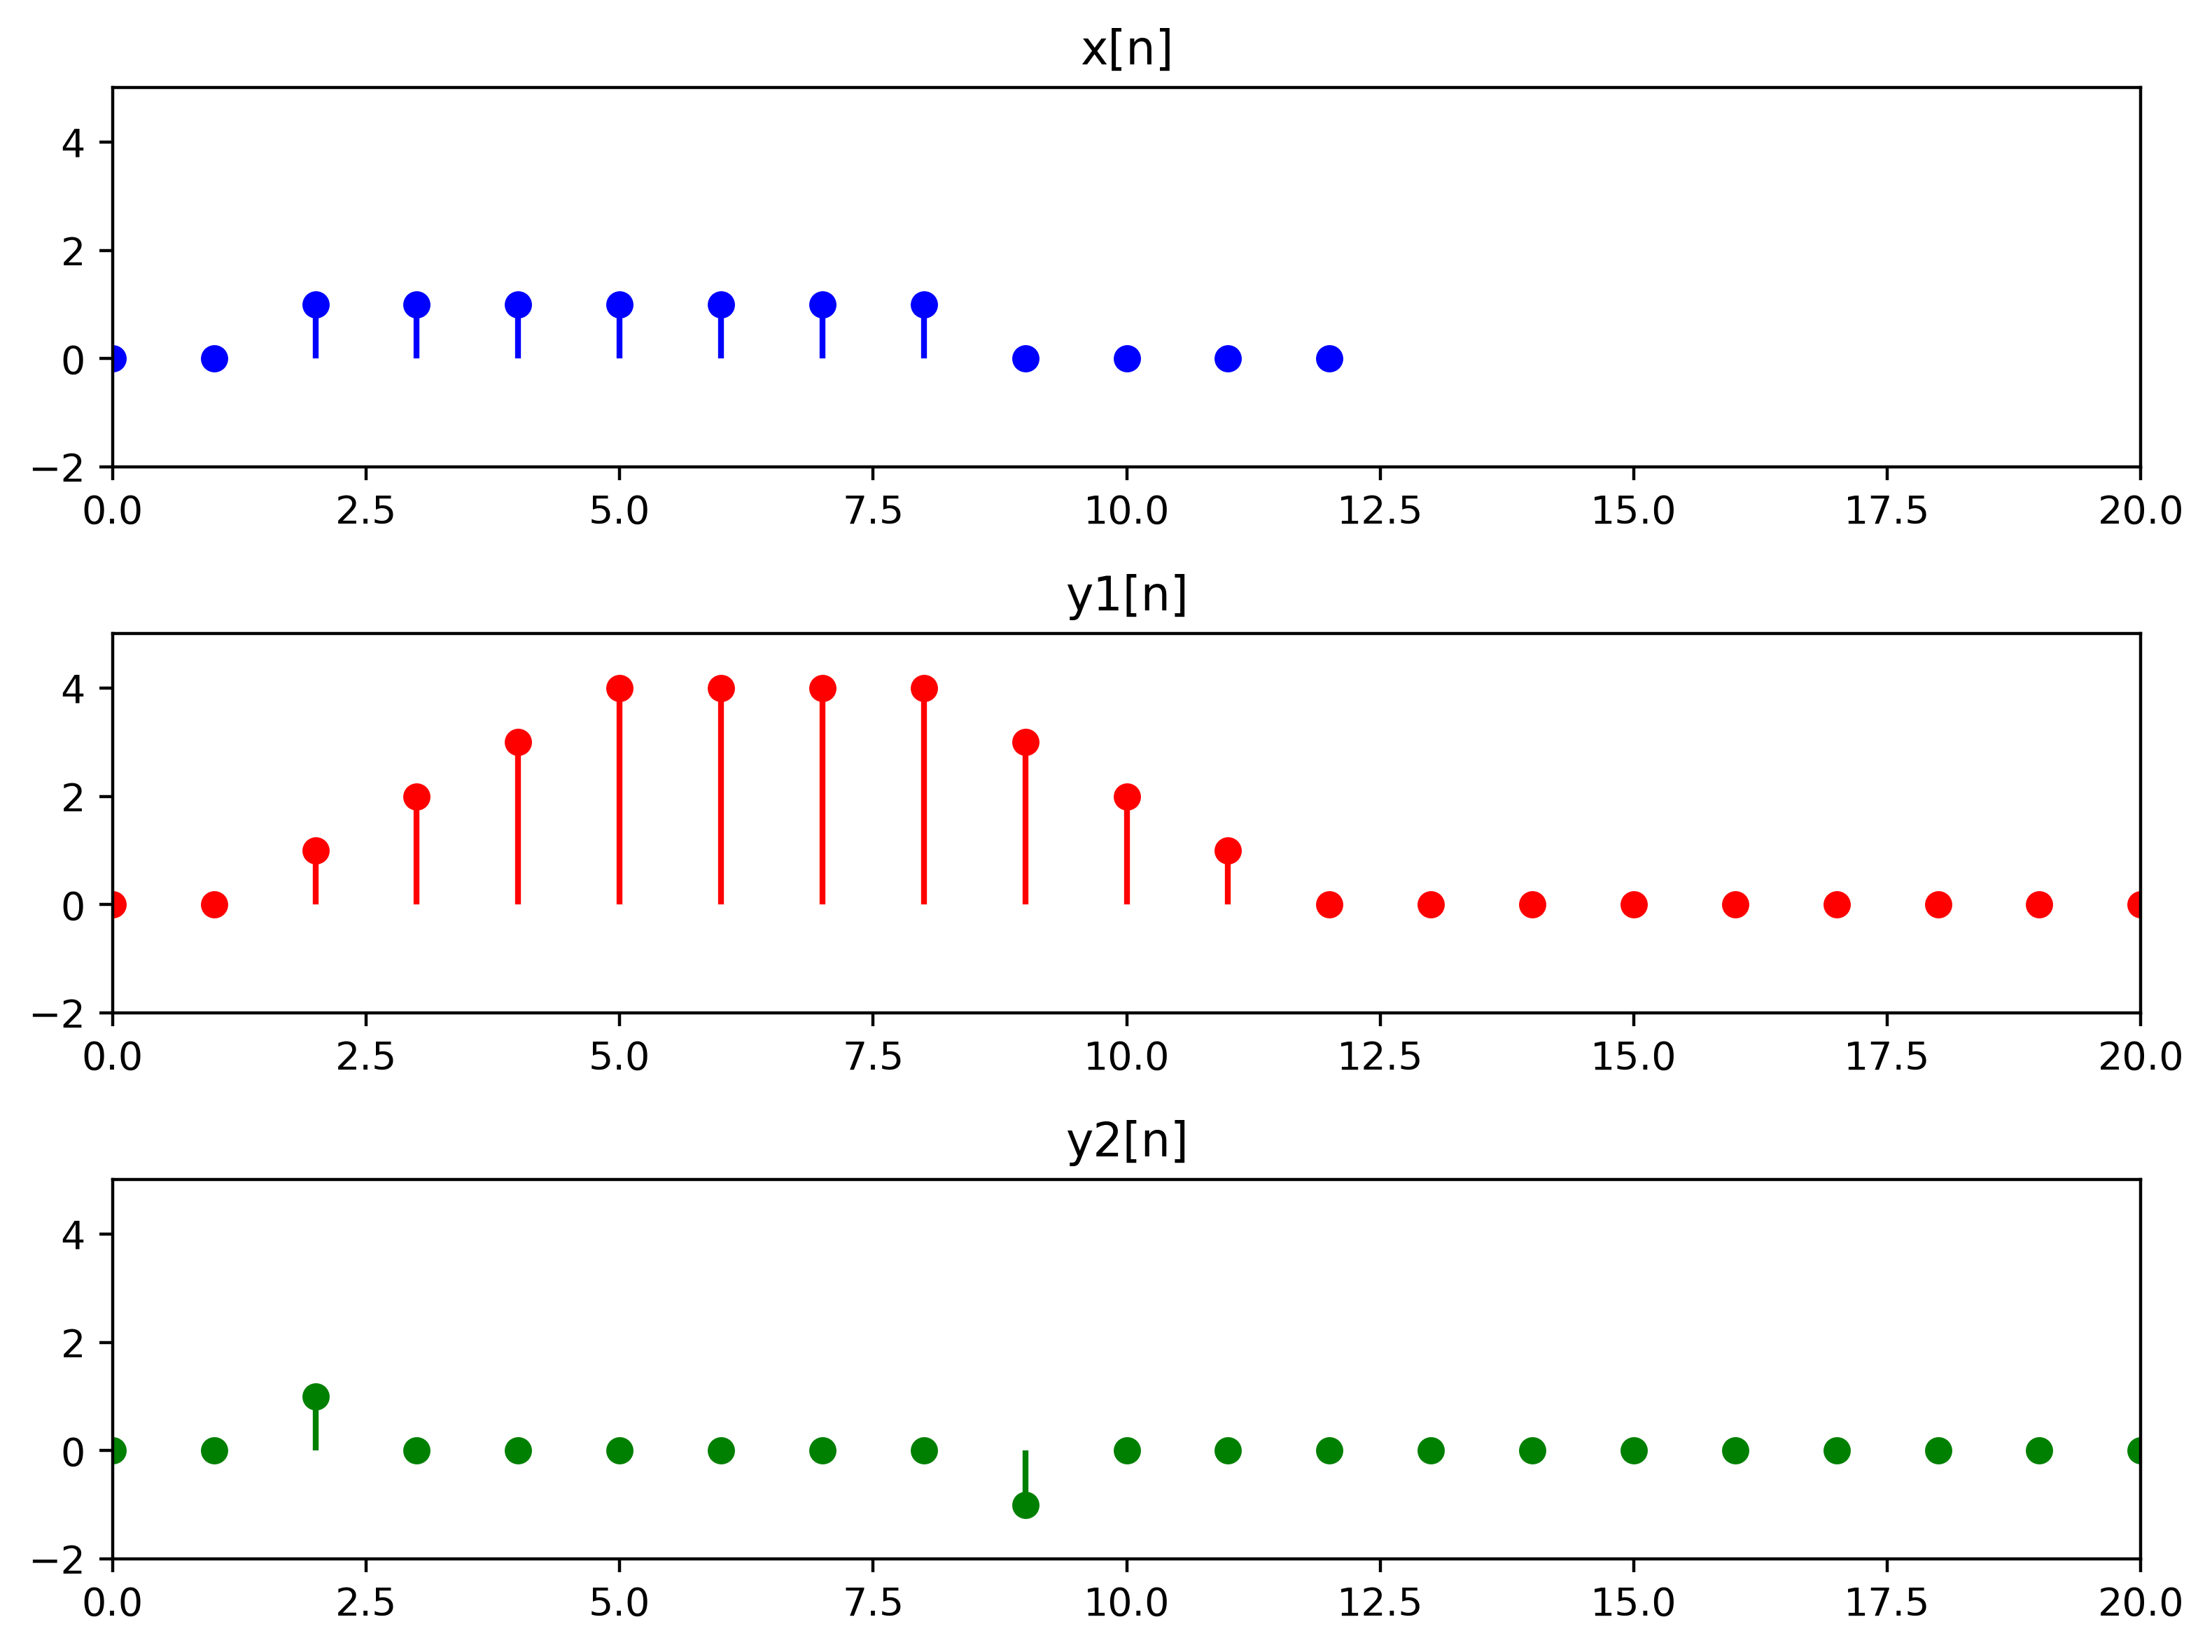

In [2]:
# Assignment 1 - Time Scaling Function

import numpy as np
import matplotlib.pyplot as plt

# Part A - Create signals

# Create a zero array for the input signal x[n] of length 13
x = np.zeros(13)
x[2:9] = 1  # Set elements from index 2 to 8 (inclusive) to 1 for input signal x[n]

# Create a zero array for the impulse response h1[n] of length 13
h1 = np.zeros(13)
h1[:4] = 1  # Set elements from index 0 to 3 (inclusive) to 1 for impulse response h1[n]

# Create a zero array for the impulse response h2[n] of length 13
h2 = np.zeros(13)
h2[0], h2[1] = 1, -1  # Set the first two elements to 1 and -1 for impulse response h2[n]

# Part B - Convolve signals

# Perform the convolution of input signal x[n] and impulse response h1[n]
y1 = np.convolve(x, h1, mode='full')

# Perform the convolution of input signal x[n] and impulse response h2[n]
y2 = np.convolve(x, h2, mode='full')

# Part C - Plot signals

# Create an array of length 13 representing the x-axis for the input signal x[n]
nx = np.arange(13)

# Create an array representing the x-axis for the output signal y1[n]
ny1 = np.arange(len(y1))

# Create an array representing the x-axis for the output signal y2[n]
ny2 = np.arange(len(y2))

# Initialize the figure for the plots
plt.figure(figsize=(8, 6), dpi = 400)

# Plot the input signal x[n]
plt.subplot(3, 1, 1)
plt.stem(nx, x, 'b', markerfmt='bo', basefmt=' ')
plt.ylim(-2, 5)
plt.xlim(0, 20)
plt.title('x[n]')

# Plot the output signal y1[n]
plt.subplot(3, 1, 2)
plt.stem(ny1, y1, 'r', markerfmt='ro', basefmt=' ')
plt.ylim(-2, 5)
plt.xlim(0, 20)
plt.title('y1[n]')

# Plot the output signal y2[n]
plt.subplot(3, 1, 3)
plt.stem(ny2, y2, 'g', markerfmt='go', basefmt=' ')
plt.ylim(-2, 5)
plt.xlim(0, 20)
plt.title('y2[n]')

# Adjust layout to avoid overlapping and show the plots
plt.tight_layout()
plt.show()



###  Discussion

The system corresponding to impulse response h1[n] captures the moving average of the input signal. The largest values of y1[n] correspond to regions where the input signal x[n] has a constant height of 1.

The system corresponding to impulse response h2[n] captures the differences between successive samples of the input signal. The largest values of y2[n] correspond to the edges of the box in the input signal x[n], where the signal changes rapidly.


## Assignment 2 -- Smoothing Signals

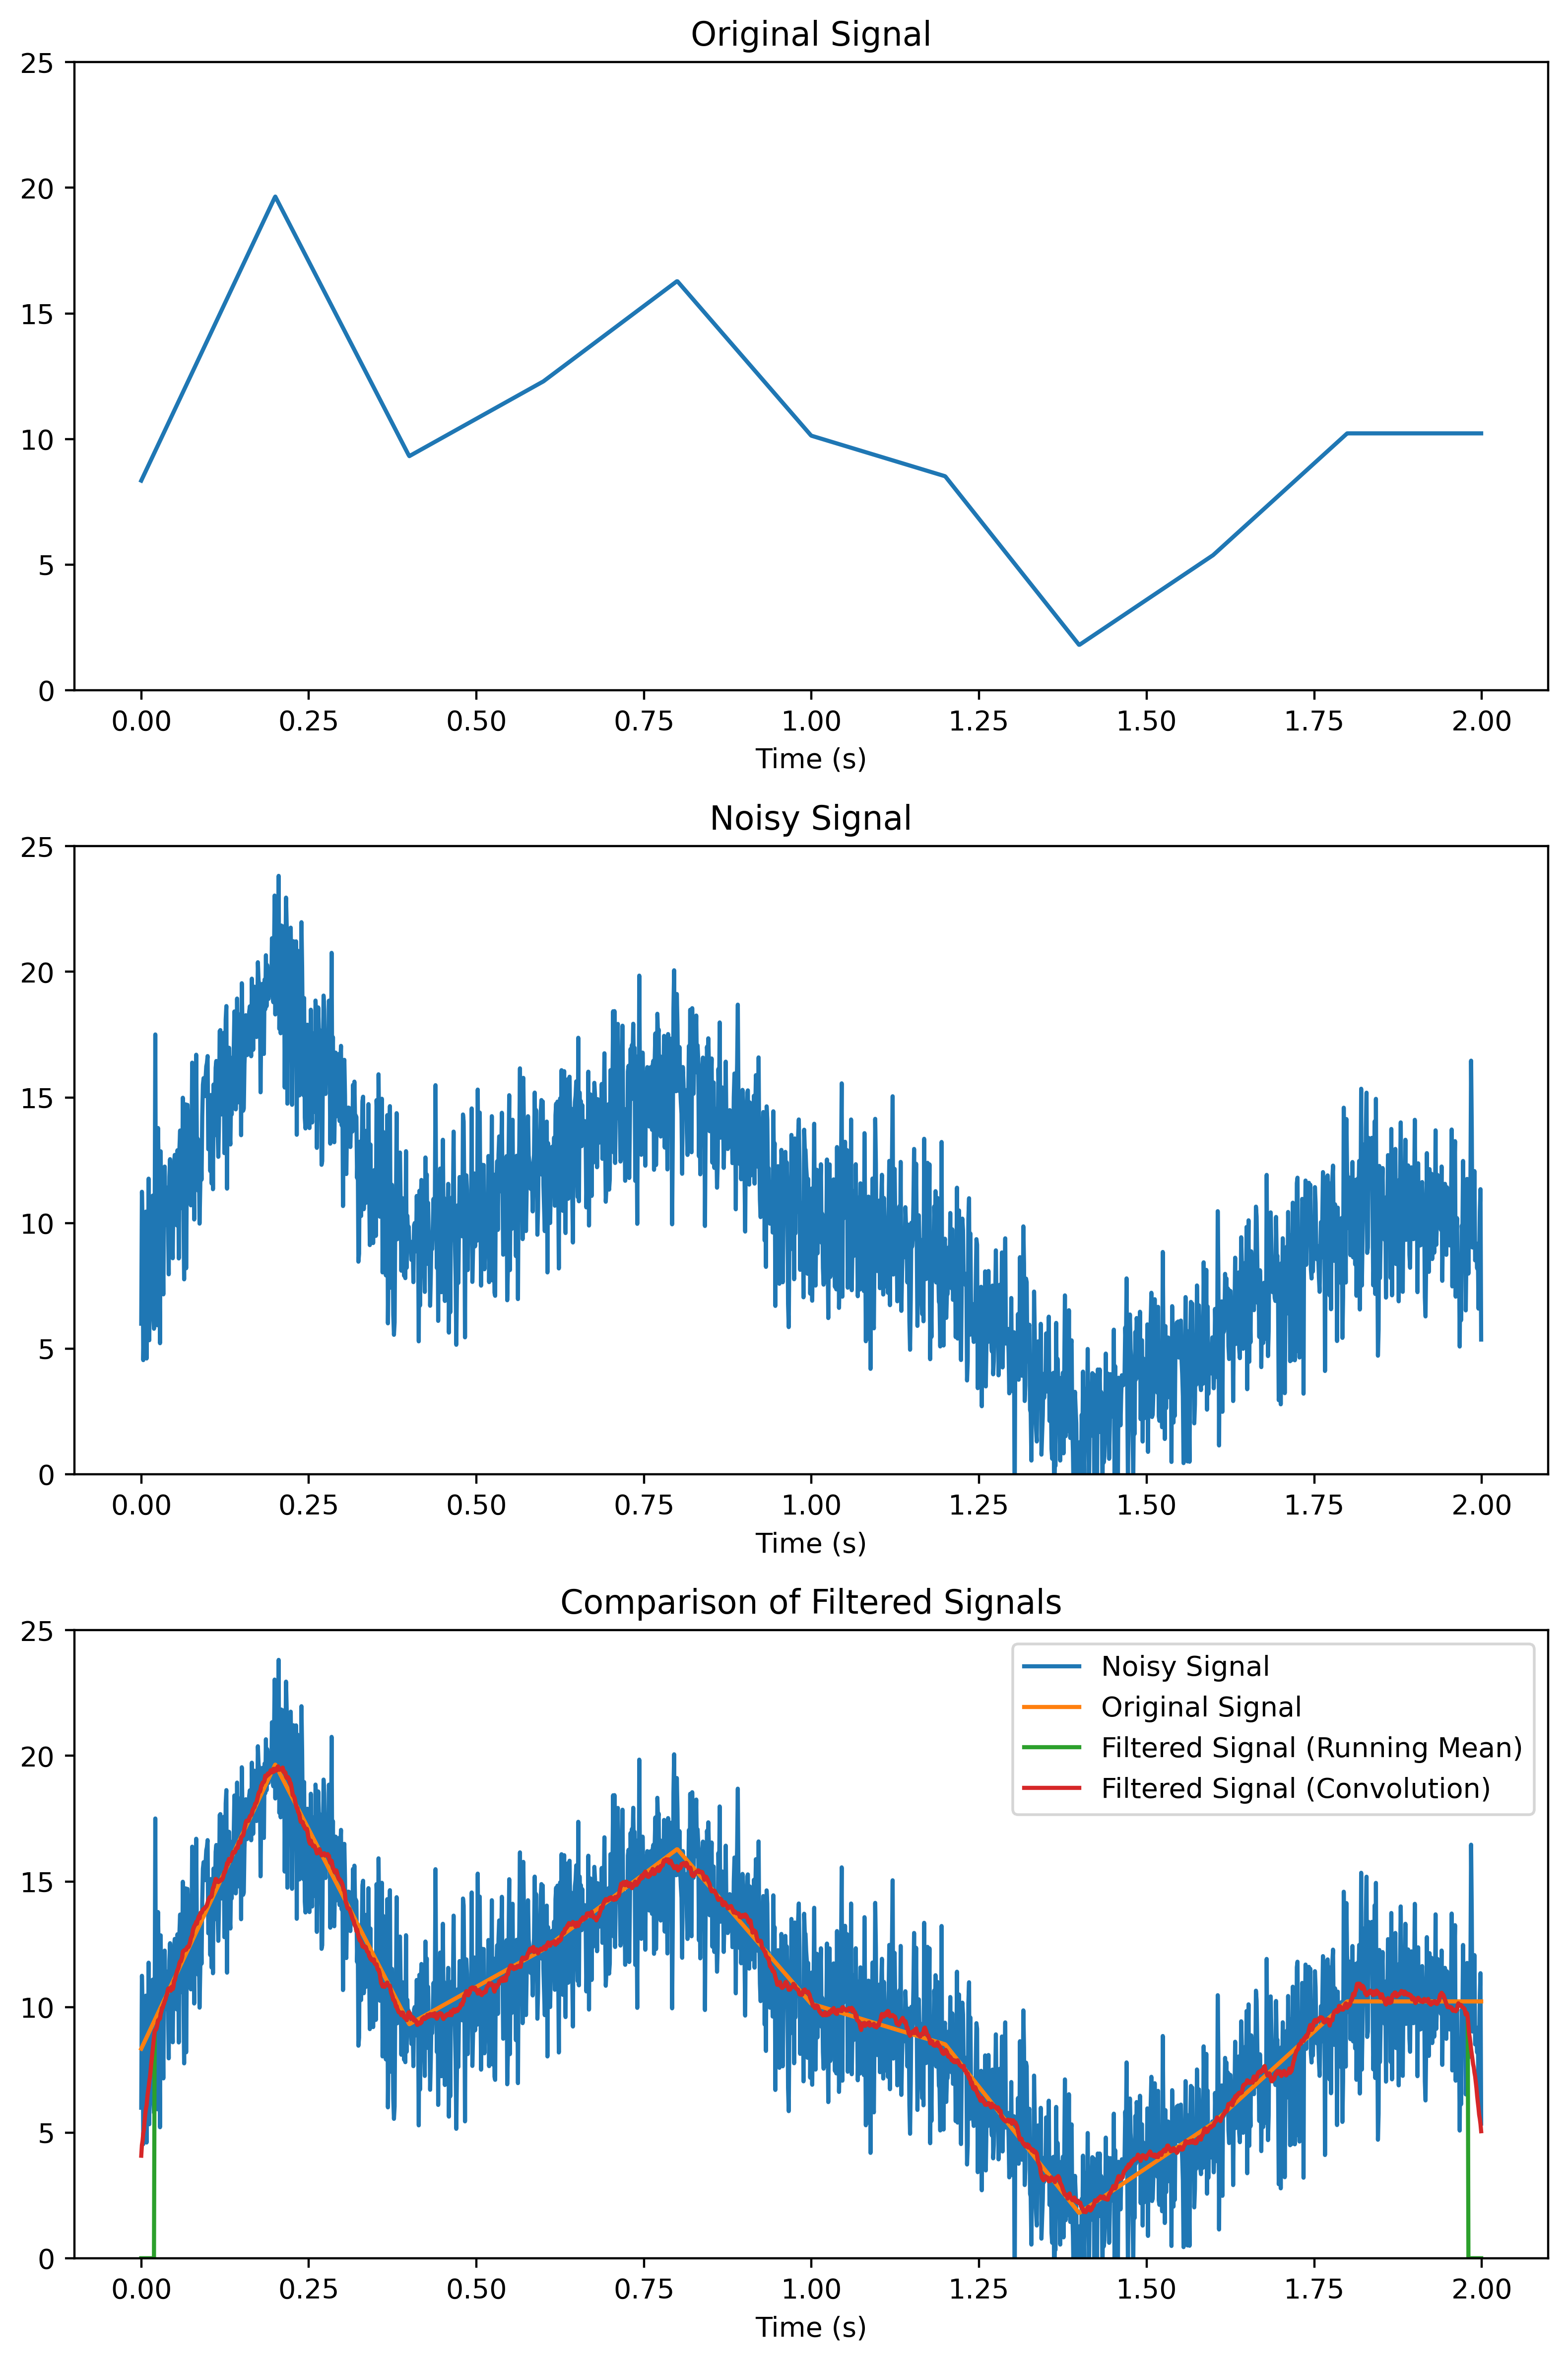

In [3]:
# Assignment 2 - Amplitude Operations on Signals

import numpy as np
import matplotlib.pyplot as plt

# Part A - Create noisy signal

# Define sampling rate and time array
srate = 1000
time = np.arange(0, 2, 1 / srate)
n = len(time)

# Create a base signal using random values and interpolation
p = 10
amp = 20
base = np.interp(np.linspace(0, p, n), np.arange(0, p), np.random.rand(p) * amp)

# Create noise and add it to the base signal
noiseamp = 2
noise = noiseamp * np.random.randn(n)
noisy_signal = base + noise

# Part B - Filter noisy signal using a running mean

# Initialize filtered signal array and filtering window size
k = 20
filtsig1 = np.zeros(n)

# Compute running mean for each point in the noisy_signal
for i in range(k, n - k):
    filtsig1[i] = np.mean(noisy_signal[i - k:i + k + 1])

# Part C - Filter noisy signal using convolution

# Create a filter kernel (moving average filter)
hfilt = np.ones(2 * k + 1) / (2 * k + 1)

# Convolve the noisy signal with the filter kernel
filtsig2 = np.convolve(noisy_signal, hfilt, mode='same')

# Plotting

# Initialize the figure with a specific size
plt.figure(figsize=(8, 12), dpi = 400)

# Plot the original signal (base)
plt.subplot(3, 1, 1)
plt.plot(time, base)
plt.ylim(0, 25)
plt.title('Original Signal')
plt.xlabel('Time (s)')

# Plot the noisy signal
plt.subplot(3, 1, 2)
plt.plot(time, noisy_signal)
plt.ylim(0, 25)
plt.title('Noisy Signal')
plt.xlabel('Time (s)')

# Plot the comparison of filtered signals
plt.subplot(3, 1, 3)
plt.plot(time, noisy_signal, label='Noisy Signal')
plt.plot(time, base, label='Original Signal')
plt.plot(time, filtsig1, label='Filtered Signal (Running Mean)')
plt.plot(time, filtsig2, label='Filtered Signal (Convolution)')
plt.ylim(0, 25)
plt.title('Comparison of Filtered Signals')
plt.xlabel('Time (s)')
plt.legend()

# Adjust layout to avoid overlapping and show the plots
plt.tight_layout()
plt.show()



###  Discussion

Both methods, the running mean and the convolution with a box filter, smooth the noisy signal. The running mean filter calculates the average value of +/- k samples. The convolution with the box filter also calculates a weighted average but uses the convolution function.

The differences between the two methods are minimal, and both effectively smooth the signal. When the noise is amplified, both methods still smooth the signal, but the result will be less accurate. When the value of k is changed, the smoothing effect will change as well. For larger values of k, the smoothing will be stronger, and for smaller values of k, the smoothing will be weaker.

In terms of system properties, both methods act as low-pass filters, removing high-frequency noise while preserving the low-frequency components of the signal.


## Assignment 3 -- Removing Noise from an Audio Signal 

In [4]:
# Assignment 3 -- Title of assignment 3

import simpleaudio as sa
from scipy.io import wavfile

# Part A - Read the original audio and create a noisy version

# Read the original wav file (trombone11.wav) and store the sample rate (fs) and data (tr_orig)
fs, tr_orig = wavfile.read('trombone11.wav')

# Generate noise and add it to the original audio data to create a noisy version (tr_noisy)
noise = 100 * np.random.randn(len(tr_orig))
tr_noisy = tr_orig + noise

# Write the noisy audio data to a new wav file (tr_noisy.wav)
wavfile.write('tr_noisy.wav', fs, tr_noisy.astype(np.int16))

# Part B - Filter the noisy audio

# Create a filter kernel (moving average filter) with a specific window size (k)
k = 20
hfilt = np.ones(2 * k + 1) / (2 * k + 1)

# Convolve the noisy audio data with the filter kernel to create the filtered audio data (tr_filt)
tr_filt = np.convolve(tr_noisy, hfilt, mode='same')

# Write the filtered audio data to a new wav file (tr_filt.wav)
wavfile.write('tr_filt.wav', fs, tr_filt.astype(np.int16))

# Part C - Play the original, noisy, and filtered audio

# Write the original audio data to a wav file (tr_orig.wav)
wavfile.write('tr_orig.wav', fs, tr_orig.astype(np.int16))

# Load the original, noisy, and filtered audio files as WaveObjects
tr_orig_audio = sa.WaveObject.from_wave_file('tr_orig.wav')
tr_noisy_audio = sa.WaveObject.from_wave_file('tr_noisy.wav')
tr_filt_audio = sa.WaveObject.from_wave_file('tr_filt.wav')

# Play the original audio
print("Playing Original Audio")
tr_orig_audio.play().wait_done()

# Play the noisy audio
print("Playing Noisy Audio")
tr_noisy_audio.play().wait_done()

# Play the filtered audio
print("Playing Filtered Audio")
tr_filt_audio.play().wait_done()

Playing Original Audio
Playing Noisy Audio
Playing Filtered Audio


-###  Discussion

The original audio signal is clear and crisp. After adding noise, the noisy audio signal sounds distorted and is harder to discern. After applying the convolution filter to remove the noise, the filtered audio signal sounds cleaner than the noisy one but not as clear as the original. Some of the noise is still present, and the signal may sound slightly muffled.

When the value of k is increased, the smoothing effect becomes stronger, which results in better noise removal. However, this also leads to a more muffled sound, as the high-frequency components of the original signal are attenuated. When the value of k is decreased, the smoothing effect is weaker, resulting in less noise removal, and the filtered audio signal will still have a significant amount of noise. Balancing the value of k is crucial to achieving the best noise removal without losing too much of the original signal quality.


## Assignment 4 -- Convolution with Images

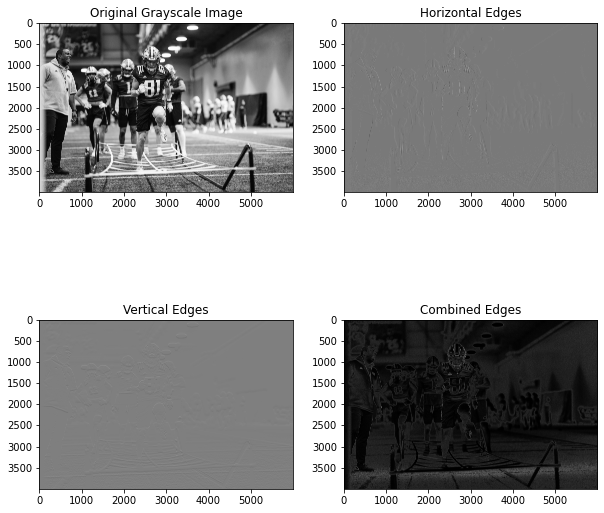

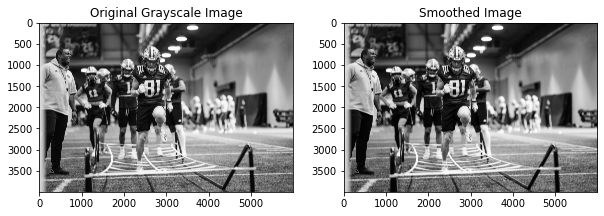

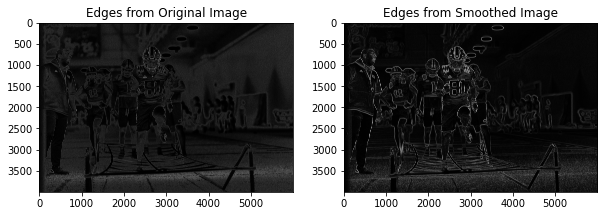

In [9]:
# Assignment 4 -- Convolution with Images

# Import necessary libraries
from skimage import color
from scipy import ndimage

# Part A - Define the Sobel Edge Detector function
def sobel_edge_detector(image):
    # Define Sobel kernels
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    # Convolve the image with the Sobel kernels
    horizontal_edges = ndimage.convolve(image, sobel_x)
    vertical_edges = ndimage.convolve(image, sobel_y)
    
    # Combine the horizontal and vertical edges using the hypot function
    combined_edges = np.hypot(horizontal_edges, vertical_edges)
    
    return horizontal_edges, vertical_edges, combined_edges

# Part B - Apply the Sobel Edge Detector to an image
image = plt.imread('Practice.jpg')
gray_image = color.rgb2gray(image)

horizontal_edges, vertical_edges, combined_edges = sobel_edge_detector(gray_image)

# Display the original and edge-detected images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title("Original Grayscale Image")
axes[0, 1].imshow(horizontal_edges, cmap='gray')
axes[0, 1].set_title("Horizontal Edges")
axes[1, 0].imshow(vertical_edges, cmap='gray')
axes[1, 0].set_title("Vertical Edges")
axes[1, 1].imshow(combined_edges, cmap='gray')
axes[1, 1].set_title("Combined Edges")
plt.show()

# Part C - Smooth the image using convolution
smooth_kernel = np.full((10, 10), 0.01)
smooth_image = ndimage.convolve(gray_image, smooth_kernel)

# Display the original and smoothed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[1].imshow(smooth_image, cmap='gray')
axes[1].set_title("Smoothed Image")
plt.show()

# Part D - Apply the Sobel Edge Detector to the smoothed image
smooth_horizontal_edges, smooth_vertical_edges, smooth_combined_edges = sobel_edge_detector(smooth_image)

# Display the edges detected from the original and smoothed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(combined_edges, cmap='gray')
axes[0].set_title("Edges from Original Image")
axes[1].imshow(smooth_combined_edges, cmap='gray')
axes[1].set_title("Edges from Smoothed Image")
plt.show()


### Discussion

Describe the differences in the results using the edge detector or the original and smoothed image. Comment on how the results change if you use a larger size smoothing filter.

This code defines a function sobel_edge_detector() in Part A, which takes an image as input and returns the horizontal edges, vertical edges, and combined edges using the Sobel edge detector. In Part B, it reads the dragonfly image, converts it to grayscale, and runs the edge detector function, then displays the original image and the outputs in a 2x2 figure. In Part C, it defines a 10x10 smoothing kernel, convolves the image with the kernel, and plots the original and smoothed images side-by-side. In Part D, it runs the edge detector function on the smoothed dragonfly image and plots the result side-by-side with the result from the edge detector on the original image.